In [39]:
import numpy as np 
import pandas as pd
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, SpatialDropout1D, BatchNormalization, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [45]:
emails = [
    "Win a free iPhone now! Click here",
    "Meeting scheduled for tomorrow at 3pm",
    "Congratulations! You've won $1000000",
    "Please review the attached document",
    "Get rich quick! Limited time offer",
    "Dinner plans this weekend?",
    "URGENT: Your account needs verification",
    "Thanks for the project update", 
    "Double your money instantly! Exclusive offer",
    "Your invoice for last month is attached",
    "Claim your free reward now, limited spots!",
    "Lunch tomorrow? Let me know your time.",
    "Suspicious login detected. Verify immediately!",
    "Looking forward to our next meeting"]

In [46]:
labels = [1,0,1,0,1, 0,1,0,1,0,1,0,1,0]
# 1 spam 0 non spam 


In [47]:
# PREPROCESSING 
#Text tokenization 
max_words = 1000 # only keep the top 1000 most common words
max_len = 20 # each email will be padded/truncated to 20 tokens 
# Convert text to numerical sequences
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(emails) # builds vocabulary from email text
sequences = tokenizer.texts_to_sequences(emails) # convert text into integer sequences


In [48]:
# PADDING 
# pads all sequences to the same length so LSTM input consistent
X = pad_sequences(sequences, maxlen = max_len)
y = np.array(labels)

In [49]:
# SPLIT Data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [50]:
# 80 % of the data are used for training and 20% for testing

In [51]:
# BUILD THE MODEL 

In [52]:
model = Sequential([
    Embedding(max_words, 32, input_length = max_len), # Converts integer sequences into dense vectors
    LSTM(64, dropout = 0.2), # LSTM learns sequential patters
    Dense(32, activation = 'relu'), # learn feature transformation
    Dropout(0.3),
    Dense(1, activation = 'sigmoid') # binary classification
])

In [53]:
# COMPILE THE MODEL 
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [54]:
# TRAIN THE MODEL 
history = model.fit(X_train, y_train, epochs = 20, 
         batch_size = 2, # number of samples processed before the model updates, 
         validation_split = 0.2, # use 20% of training for validation
         verbose =1 # show progress during training)
         )

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.4000 - loss: 0.6942 - val_accuracy: 0.6667 - val_loss: 0.6926
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7667 - loss: 0.6877 - val_accuracy: 0.3333 - val_loss: 0.6943
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6333 - loss: 0.6897 - val_accuracy: 0.3333 - val_loss: 0.6940
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5833 - loss: 0.6920 - val_accuracy: 0.3333 - val_loss: 0.6941
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8667 - loss: 0.6750 - val_accuracy: 0.3333 - val_loss: 0.6938
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6333 - loss: 0.6897 - val_accuracy: 0.3333 - val_loss: 0.6934
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8667 - loss: 0.6771 - val_accuracy: 0.3333 - val_loss: 0.6932
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8667 - loss: 0.6621 - val_accuracy: 0.3333 - val_loss: 0.6933

In [61]:
max_len = 25

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(emails) # builds vocabulary from email text
sequences = tokenizer.texts_to_sequences(emails) # convert text into integer sequences

In [64]:
X = pad_sequences(sequences, maxlen = max_len, padding = 'post', truncating=  'post')
y = np.array(labels)

In [65]:
# SPLIT Data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [66]:
model1 = Sequential([
    Embedding(max_words, 128, input_length=max_len),    # Higher embedding dimension
    SpatialDropout1D(0.3),                              # Drops entire word embeddings to improve robustness
    Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),
    BatchNormalization(),                               # Normalizes activations to speed up learning
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),       # Second LSTM layer for deeper temporal learning
    Dense(64, activation='relu', kernel_regularizer='l2'),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')                      # Binary classification output
])

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [67]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [68]:
# TRAIN THE MODEL 
history1 = model1.fit(X_train, y_train, epochs = 20, 
         batch_size = 2, # number of samples processed before the model updates, 
         validation_split = 0.2, # use 20% of training for validation
         verbose =1 # show progress during training)
         )

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 510ms/step - accuracy: 0.3667 - loss: 1.8889 - val_accuracy: 0.6667 - val_loss: 1.7379
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3167 - loss: 1.7487 - val_accuracy: 0.6667 - val_loss: 1.7118
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4667 - loss: 1.6784 - val_accuracy: 0.6667 - val_loss: 1.6900
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4500 - loss: 1.6791 - val_accuracy: 0.6667 - val_loss: 1.6702
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 1.7194 - val_accuracy: 0.6667 - val_loss: 1.6529
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5500 - loss: 1.5914 - val_accuracy: 0.6667 - val_loss: 1.6363
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4500 - loss: 1.6563 - val_accuracy: 0.3333 - val_loss: 1.6195
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6000 - loss: 1.6278 - val_accuracy: 0.3333 - val_loss: 1.603

In [69]:
import matplotlib.pyplot as plt

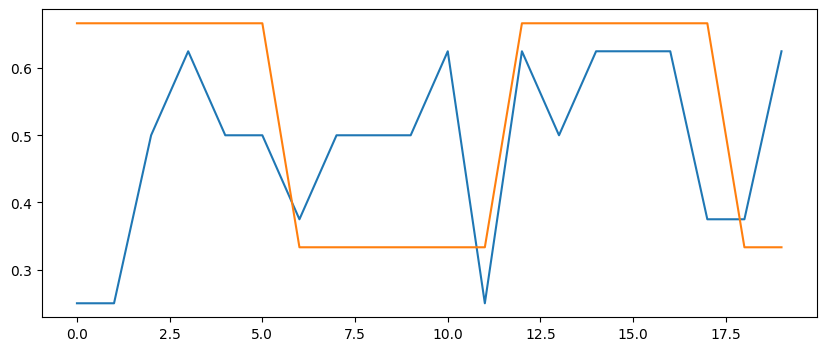

In [70]:
plt.figure(figsize =(10,4))
plt.plot(history1.history['accuracy'], label = 'Train Accuracy')
plt.plot(history1.history['val_accuracy'], label = 'Val Accuracy')

In [72]:
# EVALUATE THE MODEL PERFORMANCE 
loss, accuracy = model1.evaluate(X_test, y_test, verbose =1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.6667 - loss: 1.4270


In [88]:
test_emails = [ 
      "Congratulations! You've won $1000000",
              "Meeting scheduled for tomorrow at 3pm", 
               "Looking forward to our next meeting"]


In [89]:
# convert new emails into padded sequences 
test_seq = tokenizer.texts_to_sequences(test_emails)
test_pad = pad_sequences(test_seq, maxlen = max_len)

In [90]:
predictions = model1.predict(test_pad)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[0.49454224],
       [0.49559215],
       [0.49710542]], dtype=float32)

In [91]:
for email, pred in zip(test_emails, predictions):
    label = "SPAM" if pred > 0.5 else "NOT SPAM"
    print(f"{email[:40]}..... > {label} ({pred[0]:.2f})")

Congratulations! You've won $1000000..... > NOT SPAM (0.49)
Meeting scheduled for tomorrow at 3pm..... > NOT SPAM (0.50)
Looking forward to our next meeting..... > NOT SPAM (0.50)
